# **Pertemuan 2: Basic Concept of Probability Theory**
<hr>

### By: Andreas Syaloom Kurniawan (552751)

Expected Value E[X]: 3 
Variance Var(X): 9 


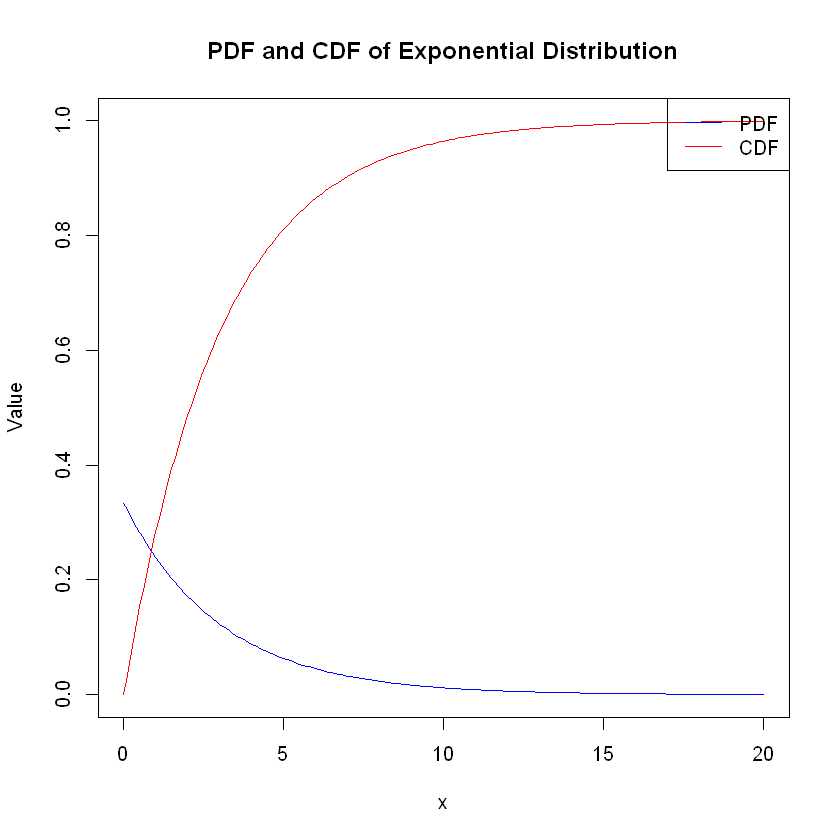

In [13]:
# Define the lambda parameter
lambda <- 1/3

# Define the PDF function for the exponential distribution
pdf_function <- function(x) {
  lambda * exp(-lambda * x)
}

# Define a function to calculate the CDF by integrating the PDF
cdf_function <- function(x) {
  sapply(x, function(x_val) {
    integrate(pdf_function, lower = 0, upper = x_val)$value
  })
}

# Create a sequence of x values
x_values <- seq(0, 20, by = 0.1)

# Calculate PDF values
pdf_values <- pdf_function(x_values)

# Calculate CDF values
cdf_values <- cdf_function(x_values)

# Plotting PDF and CDF
plot(x_values, pdf_values, type = "l", col = "blue", ylim = c(0, max(pdf_values, cdf_values)), ylab = "Value", xlab = "x", main = "PDF and CDF of Exponential Distribution")
lines(x_values, cdf_values, col = "red")
legend("topright", legend = c("PDF", "CDF"), col = c("blue", "red"), lty = 1)


## Example of Finding Probability of $P(a \leq X\leq b)$ from a particular CDF function

The PDF function is $f_X(x)=\frac{1}{2} e^{-|x|}$, find $P(-1\leq X \leq 1)$.

[1] "P(-1 <= X <= 1) = 0.632120558478143"


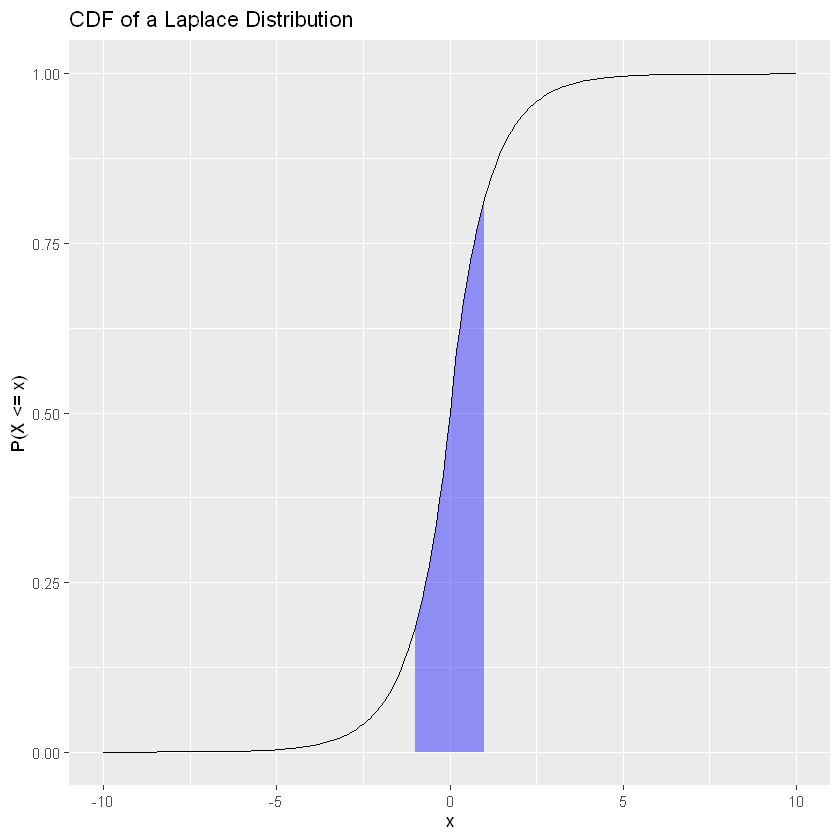

In [9]:
# Load necessary libraries
library(ggplot2)
library(pracma)

# Define the PDF
pdf <- function(x) {
  0.5 * exp(-abs(x))
}

# Numerical integration to find the CDF at each x
cdf <- function(x) {
  integrate(pdf, lower = -Inf, upper = x)$value
}

# Define a range of x values
x_values <- seq(-10, 10, by = 0.1)

# Calculate the CDF values for these x values
cdf_values <- sapply(x_values, cdf)

# Create a data frame to store the values for plotting
data_frame <- data.frame(x = x_values, CDF = cdf_values)

# Create a subset of the data frame for the interval -1 to 1
subset_data <- data_frame[data_frame$x >= -1 & data_frame$x <= 1,]

# Plotting the CDF using ggplot2
ggplot(data_frame, aes(x = x, y = CDF)) +
  geom_line() + 
  geom_ribbon(data = subset_data, aes(ymin = 0, ymax = CDF), fill = "blue", alpha = 0.4) + # Highlight the interval with a blue area
  ggtitle("CDF of a Laplace Distribution") +
  xlab("x") + 
  ylab("P(X <= x)")

# Example: Calculate P(-1 <= X <= 1)
p_a <- cdf(-1)
p_b <- cdf(1)

# Calculate the probability
probability <- p_b - p_a

# Print the result
print(paste("P(-1 <= X <= 1) =", probability))